In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from normalization import Normalizer
from algorithmsdp import AlgorithmDP

# Construct the full file path
base_dir = r'C:\Users\David\Documents\DifPrivHealthCostPredict'
pickle_file = 'Entrenamiento_cronicas_N.pkl'
file_path = os.path.join(base_dir, pickle_file)

# Read the pickle file
with open(file_path, 'rb') as file:
    df = pickle.load(file)

In [2]:
t_i=df[df['Valor_Neto']!=0]

In [3]:
df['Valor_Neto_normalized'] = Normalizer.normalize_to_range(df['Valor_Neto'])
df['Valor_Neto_normalized'].describe()



c:\Users\David\Documents\DifPrivHealthCostPredict\Algoritmos\normalization.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vector = torch.tensor(vector, dtype=torch.float32)


count    996234.000000
mean         -0.999916
std           0.002022
min          -1.000000
25%          -1.000000
50%          -0.999980
75%          -0.999914
max           1.000000
Name: Valor_Neto_normalized, dtype: float64

In [ ]:
from algorithmsdp import AlgorithmDP
# Example usage of duchi_solution
df['duchi'] = AlgorithmDP.duchi_solution(df['Valor_Neto_normalized'], 3)

# Example usage of piecewise_mechanism
df['piecewise'] = AlgorithmDP.piecewise_mechanism(df['Valor_Neto_normalized'], 3)



c:\Users\David\Documents\DifPrivHealthCostPredict\Algoritmos\algorithmsdp.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_i_tensor = torch.tensor(t_i_vector, dtype=torch.float32)
c:\Users\David\Documents\DifPrivHealthCostPredict\Algoritmos\algorithmsdp.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_i_tensor = torch.tensor(t_i_vector, dtype=torch.float32)


Description for epsilon=0.1:
count    996234.000000
mean          9.475253
std          10.020438
min          -0.049958
25%          -0.049958
50%          -0.049958
75%          20.016655
max          20.016655
Name: Valor_Neto_privacy_0.1, dtype: float64

Description for epsilon=0.5:
count    996234.000000
mean          1.390098
std           2.098315
min          -0.244919
25%          -0.244919
50%          -0.244919
75%           4.082988
max           4.082988
Name: Valor_Neto_privacy_0.5, dtype: float64



c:\Users\David\Documents\DifPrivHealthCostPredict\Algoritmos\algorithmsdp.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_i_tensor = torch.tensor(t_i_vector, dtype=torch.float32)
c:\Users\David\Documents\DifPrivHealthCostPredict\Algoritmos\algorithmsdp.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_i_tensor = torch.tensor(t_i_vector, dtype=torch.float32)


Description for epsilon=1.0:
count    996234.000000
mean          0.243395
std           1.164035
min          -0.462117
25%          -0.462117
50%          -0.462117
75%           2.163954
max           2.163954
Name: Valor_Neto_privacy_1.0, dtype: float64

Description for epsilon=2.0:
count    996234.000000
mean         -0.514017
std           0.672559
min          -0.761594
25%          -0.761594
50%          -0.761594
75%          -0.761594
max           1.313035
Name: Valor_Neto_privacy_2.0, dtype: float64



c:\Users\David\Documents\DifPrivHealthCostPredict\Algoritmos\algorithmsdp.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_i_tensor = torch.tensor(t_i_vector, dtype=torch.float32)


Description for epsilon=5.0:
count    996234.000000
mean         -0.973149
std           0.163551
min          -0.986614
25%          -0.986614
50%          -0.986614
75%          -0.986614
max           1.013567
Name: Valor_Neto_privacy_5.0, dtype: float64



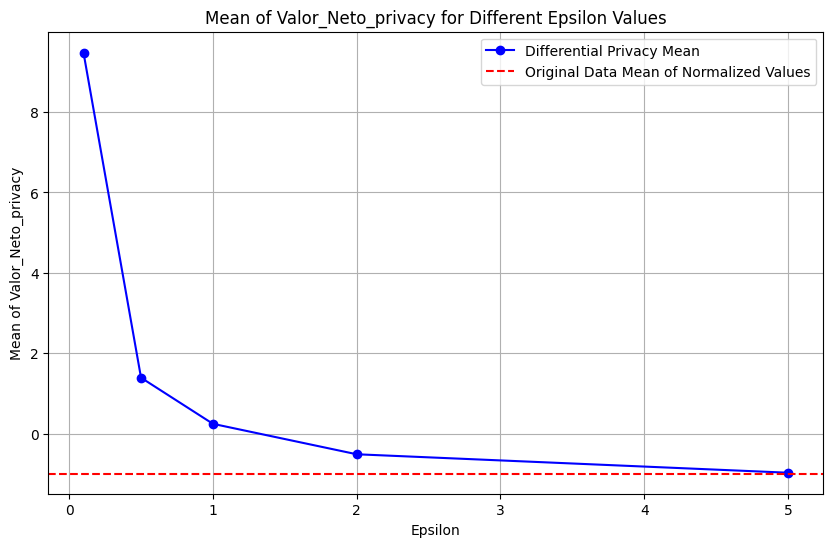

In [4]:
# Calculate the true mean of the normalized values
true_mean = df['Valor_Neto_normalized'].mean()

# Define the range of epsilon values
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Apply the differential privacy solution and describe the results
means = []

for epsilon in epsilon_values:
    df[f'Valor_Neto_privacy_{epsilon}'] = AlgorithmDP.duchi_solution(df['Valor_Neto_normalized'], epsilon)
    description = df[f'Valor_Neto_privacy_{epsilon}'].describe()
    mean_value = description['mean']
    means.append(mean_value)
    print(f"Description for epsilon={epsilon}:\n{description}\n")

# Plot the different means
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, means, marker='o', linestyle='-', color='b', label='Differential Privacy Mean')
plt.axhline(y=true_mean, color='r', linestyle='--', label='Original Data Mean of Normalized Values')
plt.xlabel('Epsilon')
plt.ylabel('Mean of Valor_Neto_privacy')
plt.title('Mean of Valor_Neto_privacy for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()

### Piecewise Mechanism

In [4]:
# Calculate the true mean of the normalized values
true_mean = df['Valor_Neto_normalized'].mean()

# Define the range of epsilon values
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Apply the differential privacy solution and describe the results
means = []

for epsilon in epsilon_values:
    df[f'Valor_Neto_privacy_{epsilon}'] = AlgorithmDP.piecewise_mechanism(df['Valor_Neto_normalized'], epsilon)
    description = df[f'Valor_Neto_privacy_{epsilon}'].describe()
    mean_value = description['mean']
    means.append(mean_value)
    print(f"Description for epsilon={epsilon}:\n{description}\n")

# Plot the different means
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, means, marker='o', linestyle='-', color='b', label='Differential Privacy Mean')
plt.axhline(y=true_mean, color='r', linestyle='--', label='Original Data Mean of Normalized Values')
plt.xlabel('Epsilon')
plt.ylabel('Mean of Valor_Neto_privacy')
plt.title('Mean of Valor_Neto_privacy for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\David\Documents\DifPrivHealthCostPredict\Algoritmos\algorithmsdp.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_i_tensor = torch.tensor(t_i_vector, dtype=torch.float32)


t_i_tensor[0] = -0.9999834299087524, l(t_i) = -40.00800323486328, r(t_i) = -0.9996604919433594, C = 40.00834274291992
t_i_tensor[1] = -0.9998676776885986, l(t_i) = -40.00563049316406, r(t_i) = -0.9972877502441406, C = 40.00834274291992
t_i_tensor[2] = -0.9999939203262329, l(t_i) = -40.008216857910156, r(t_i) = -0.9998741149902344, C = 40.00834274291992
t_i_tensor[3] = -1.0, l(t_i) = -40.00834274291992, r(t_i) = -1.0, C = 40.00834274291992
t_i_tensor[4] = -1.0, l(t_i) = -40.00834274291992, r(t_i) = -1.0, C = 40.00834274291992
t_i_tensor[5] = -0.9998644590377808, l(t_i) = -40.00556182861328, r(t_i) = -0.9972190856933594, C = 40.00834274291992
t_i_tensor[6] = -1.0, l(t_i) = -40.00834274291992, r(t_i) = -1.0, C = 40.00834274291992
t_i_tensor[7] = -0.9995400309562683, l(t_i) = -39.99890899658203, r(t_i) = -0.9905662536621094, C = 40.00834274291992
t_i_tensor[8] = -0.9999845623970032, l(t_i) = -40.008026123046875, r(t_i) = -0.9996833801269531, C = 40.00834274291992
t_i_tensor[9] = -1.0, l(t_

KeyboardInterrupt: 